In [1]:
import pandas as pd
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout,MaxPooling1D
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, Embedding, Add
from tensorflow.keras.layers import Conv1D, GlobalAveragePooling1D, AveragePooling2D, MaxPooling2D, MaxPool1D, ZeroPadding1D, GlobalMaxPooling2D, GlobalAveragePooling2D, LSTM, SpatialDropout1D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam 
import tensorflow as tf

C:\Users\A N A N T H\anaconda3\envs\aani\lib\site-packages\google\auth\crypt\_cryptography_rsa.py:22: CryptographyDeprecationWarning: Python 3.6 is no longer supported by the Python core team. Therefore, support for it is deprecated in cryptography. The next release of cryptography (40.0) will be the last to support Python 3.6.
  import cryptography.exceptions
C:\Users\A N A N T H\anaconda3\envs\aani\lib\site-packages\requests\__init__.py:104: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
mit_test_data = pd.read_csv('mitbih_test.csv', header=None)
mit_train_data = pd.read_csv('mitbih_train.csv', header=None)

In [3]:
print(mit_train_data.shape)
print(mit_test_data.shape)

(87554, 188)
(21892, 188)


In [4]:
mit_train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
x_train, y_train = mit_train_data.iloc[: , :-1], mit_train_data.iloc[: , -1]

In [6]:
y_train

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
87549    4.0
87550    4.0
87551    4.0
87552    4.0
87553    4.0
Name: 187, Length: 87554, dtype: float64

In [7]:
testX, testy = mit_test_data.iloc[: , :-1], mit_test_data.iloc[: , -1]

In [8]:
mit_test_data


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [9]:
import matplotlib.pyplot as plt

y_train = to_categorical(y_train)
testy = to_categorical(testy)

In [76]:
datax = pd.concat([x_train,testX])
datay = np.concatenate((y_train, testy), axis = 0)

In [77]:
print("testX shape=" +str(datax.shape))
print("testy shape=" +str(datay.shape))

testX shape=(109446, 187)
testy shape=(109446, 5)


In [82]:
import numpy as np

# Define the hyperparameter space
hyperparameter_space = {
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [32, 64, 128],
    'hidden_units': [64, 128, 256],
    # Add more hyperparameters as needed
}

# Define the PCO parameters
population_size = 10
max_iterations = 100

def train_and_evaluate_dnn(hyperparameters):
    # Build the DNN model
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=(187,)))
    model.add(layers.Dense(hyperparameters['hidden_units'], activation="relu"))
    model.add(layers.Dense(32, activation="relu"))
    model.add(layers.Dense(5, activation="softmax"))

    # Compile the model
    optimizer = Adam(learning_rate=hyperparameters['learning_rate'])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(datax[:43778], datay[:43778], batch_size=hyperparameters['batch_size'],
                        epochs=10, verbose=0, validation_data=(datax[43778:], datay[43778:]))

    # Evaluate the model
    performance = model.evaluate(testX, testy, verbose=0)[1]  # Get the accuracy metric
    return performance


def search_operator(hyperparameters, search_range):
    new_hyperparameters = {}
    for key, value in hyperparameters.items():
        new_value = value + np.random.uniform(-search_range, search_range)
        new_hyperparameters[key] = new_value
    return new_hyperparameters

def follow_operator(hyperparameters, best_hyperparameters):
    new_hyperparameters = {}
    for key, value in hyperparameters.items():
        best_value = best_hyperparameters[key]
        new_value = value + np.random.uniform(-1, 1) * (best_value - value)
        new_hyperparameters[key] = new_value
    return new_hyperparameters
try:
    population = []
    for _ in range(population_size):
        hyperparameters = {}
        for key, values in hyperparameter_space.items():
            hyperparameters[key] = np.random.choice(values)
        population.append(hyperparameters)

    # Perform PCO iterations
    best_performance = float('-inf')
    best_hyperparameters = None

    for iteration in range(max_iterations):
        for hyperparameters in population:
            # Train and evaluate the DNN using the current hyperparameters
            performance = train_and_evaluate_dnn(hyperparameters)

            # Update the best configuration if necessary
            if performance > best_performance:
                best_performance = performance
                best_hyperparameters = hyperparameters

        new_population = []

        # Apply PCO operators to update the population
        for hyperparameters in population:
            if np.random.random() < 0.5:
                new_hyperparameters = search_operator(hyperparameters, search_range=0.1)
            else:
                new_hyperparameters = follow_operator(hyperparameters, best_hyperparameters)
            new_population.append(new_hyperparameters)

        population = new_population
except:
    pass


In [101]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
acc = []
pre = []
re = []
f1s = []
for i in [40,50,60,70,80,90]:
    nu_data = int(datay.shape[0]*(i/100))
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=(187,)))
    model.add(layers.Dense(best_hyperparameters['hidden_units'], activation="relu"))
    model.add(layers.Dense(32,  activation="relu"))
    model.add(layers.Dense(5, activation="softmax"))
    model.compile(optimizer=Adam(learning_rate=best_hyperparameters['learning_rate']), loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(datax[:nu_data], datay[:nu_data],batch_size=best_hyperparameters['batch_size'],
    epochs=50,verbose=1,validation_data = (datax[nu_data:], datay[nu_data:]))
    yhat_classes = model.predict(datax[nu_data:])
    accuracy = accuracy_score(datay[nu_data:].argmax(1), yhat_classes.argmax(1))
    acc.append(accuracy)
    # precision tp / (tp + fp)
    precision = precision_score(datay[nu_data:].argmax(1), yhat_classes.argmax(1),average='macro')
    pre.append(precision)    # recall: tp / (tp + fn)
    recall = recall_score(datay[nu_data:].argmax(1), yhat_classes.argmax(1),average='macro')
    re.append(recall)    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(datay[nu_data:].argmax(1), yhat_classes.argmax(1),average='macro')
    f1s.append(f1)

In [94]:
from sklearn.model_selection import KFold, StratifiedKFold                         
kfold = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)

In [102]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
acc1 = []
pre1 = []
re1 = []
f1s1 = []
for train_index, test_index in kfold.split(x_train, y_train.argmax(1)):
    x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[test_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=(187,)))
    model.add(layers.Dense(best_hyperparameters['hidden_units'], activation="relu"))
    model.add(layers.Dense(32,  activation="relu"))
    model.add(layers.Dense(5, activation="softmax"))
    model.compile(optimizer=Adam(lr=best_hyperparameters['learning_rate']), loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train,batch_size=best_hyperparameters['batch_size'],
    epochs=50,verbose=1,validation_data = (testX, testy))
    yhat_classes = model.predict(x_val_fold)
    accuracy = accuracy_score(y_val_fold.argmax(1), yhat_classes.argmax(1))
    acc1.append(accuracy)
    # precision tp / (tp + fp)
    precision = precision_score(y_val_fold.argmax(1), yhat_classes.argmax(1),average='macro')
    pre1.append(precision)    # recall: tp / (tp + fn)
    recall = recall_score(y_val_fold.argmax(1), yhat_classes.argmax(1),average='macro')
    re1.append(recall)    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_val_fold.argmax(1), yhat_classes.argmax(1),average='macro')
    f1s1.append(f1)

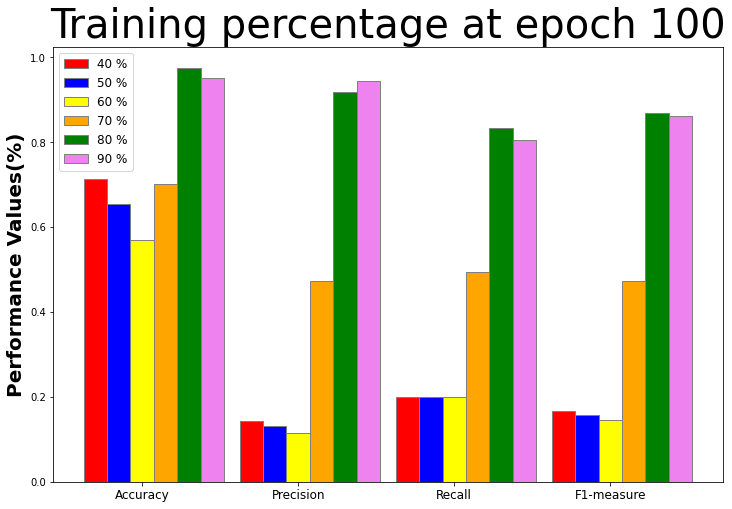

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.15
fig = plt.subplots(figsize =(12, 8))
label = ['Accuracy','Precision','Recall','F1-measure']
s40 = [acc[0],pre[0],re[0],f1s[0]]
s50 = [acc[1],pre[1],re[1],f1s[1]]
s60 = [acc[2],pre[2],re[2],f1s[2]]
s70 = [acc[3],pre[3],re[3],f1s[3]]
s80 = [acc[4],pre[4],re[4],f1s[4]]
s90 = [acc[5],pre[5],re[5],f1s[5]]
# Set position of bar on X axis
br1 = np.arange(len(s40))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]
# Make the plot
plt.bar(br1, s40, color ='red', width = barWidth,
		edgecolor ='grey', label ='40 %')
plt.bar(br2, s50, color ='blue', width = barWidth,
		edgecolor ='grey', label ='50 %')
plt.bar(br3, s60, color ='yellow', width = barWidth,
		edgecolor ='grey', label ='60 %')
plt.bar(br4, s70, color ='orange', width = barWidth,
		edgecolor ='grey', label ='70 %')
plt.bar(br5, s80, color ='green', width = barWidth,
		edgecolor ='grey', label ='80 %')
plt.bar(br6, s90, color ='violet', width = barWidth,
		edgecolor ='grey', label ='90 %')
# Adding Xticks
# plt.xlabel('Techniques', fontweight ='bold', fontsize = 20)
plt.ylabel('Performance Values(%)', fontweight ='bold', fontsize = 20)
plt.xticks([r+0.30  for r in range(len(s40))],
		label,fontsize ='large')
# plt.ylim(85,101)
plt.title('Training percentage at epoch 100',fontsize = 40)
plt.legend(fontsize ='large')
plt.show()


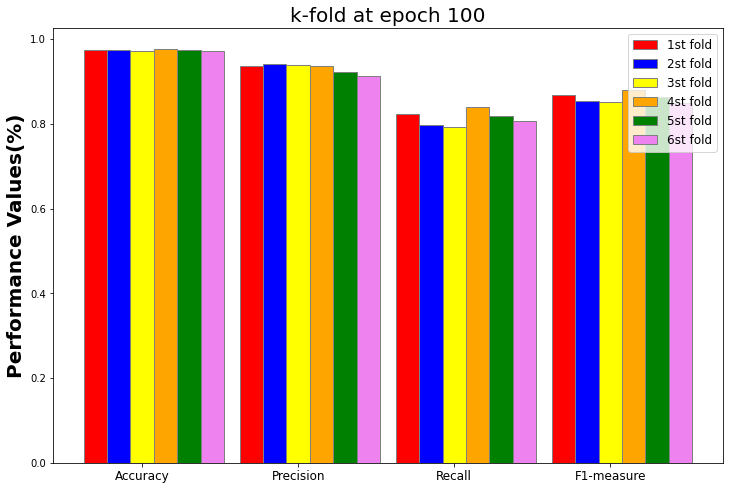

In [103]:
import numpy as np
import matplotlib.pyplot as plt
# set width of bar
barWidth = 0.15
fig = plt.subplots(figsize =(12, 8))
label = ['Accuracy','Precision','Recall','F1-measure']
s40 = [acc1[0],pre1[0],re1[0],f1s1[0]]
s50 = [acc1[1],pre1[1],re1[1],f1s1[1]]
s60 = [acc1[2],pre1[2],re1[2],f1s1[2]]
s70 = [acc1[3],pre1[3],re1[3],f1s1[3]]
s80 = [acc1[4],pre1[4],re1[4],f1s1[4]]
s90 = [acc1[5],pre1[5],re1[5],f1s1[5]]
# Set position of bar on X axis
br1 = np.arange(len(s40))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]
# Make the plot
plt.bar(br1, s40, color ='red', width = barWidth,
		edgecolor ='grey', label ='1st fold')
plt.bar(br2, s50, color ='blue', width = barWidth,
		edgecolor ='grey', label ='2st fold')
plt.bar(br3, s60, color ='yellow', width = barWidth,
		edgecolor ='grey', label ='3st fold')
plt.bar(br4, s70, color ='orange', width = barWidth,
		edgecolor ='grey', label ='4st fold')
plt.bar(br5, s80, color ='green', width = barWidth,
		edgecolor ='grey', label ='5st fold')
plt.bar(br6, s90, color ='violet', width = barWidth,
		edgecolor ='grey', label ='6st fold')
# Adding Xticks
# plt.xlabel('Techniques', fontweight ='bold', fontsize = 20)
plt.ylabel('Performance Values(%)', fontweight ='bold', fontsize = 20)
plt.xticks([r+0.30  for r in range(len(s40))],
		label,fontsize ='large')
# plt.ylim(.85,1)
plt.title('k-fold at epoch 100',fontsize = 20)
plt.legend(fontsize ='large')
plt.show()
